The objective of this notebook is to do a basic analysis of the dataset and check its characteristics

## Libraries

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /home/maldu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("../data/bronze/spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.describe()


,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
print(f"Total duplicated rows: {df.duplicated().sum()}")


Total duplicated rows: 415


## Visualization

In [7]:
class_counts = df['Category'].value_counts()


class_percentage = round((class_counts / len(df)) * 100, 2)
class_percentage

Category
ham     86.59
spam    13.41
Name: count, dtype: float64

### Plot of distribution of HAM VS. SPAM messages

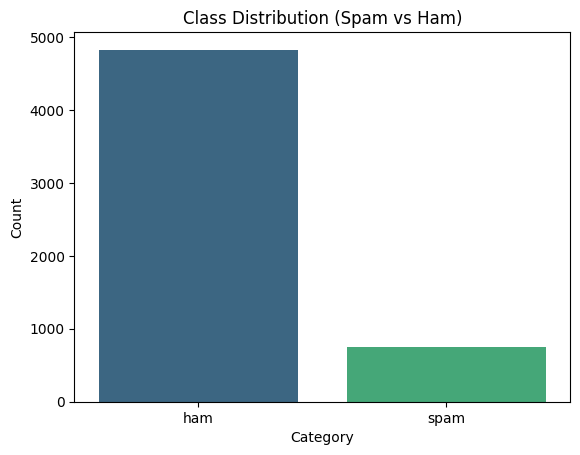

In [8]:
sns.countplot(x='Category', data=df, hue='Category', palette="viridis", legend=False)
plt.title("Class Distribution (Spam vs Ham)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

### Plot of messages word count

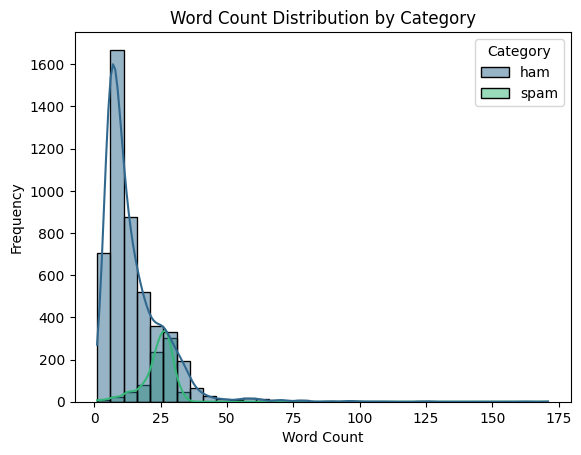

In [9]:
df['word_count'] = df['Message'].apply(lambda x: len(x.split()))
bins = np.arange(df['word_count'].min(), df['word_count'].max() + 5, 5)
sns.histplot(data=df, x='word_count', hue='Category', bins=bins, kde=True, palette="viridis")
plt.title("Word Count Distribution by Category")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


### Plot of long messages word count

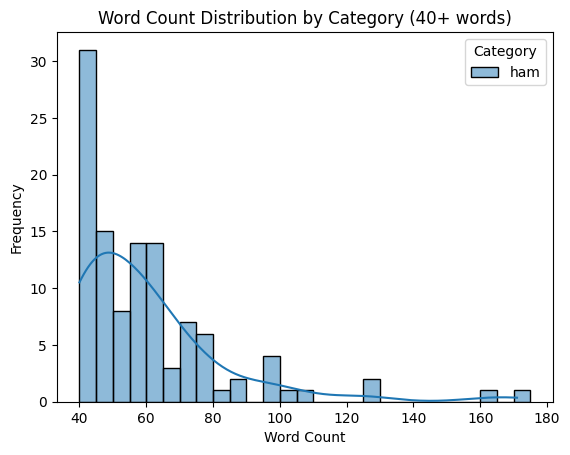

In [10]:
df_filtered = df[df['word_count'] >= 40]

bins = np.arange(df_filtered['word_count'].min(), df_filtered['word_count'].max() + 5, 5)
sns.histplot(data=df_filtered, x='word_count', hue='Category', bins=bins, kde=True, color="#3b528b")
plt.title("Word Count Distribution by Category (40+ words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


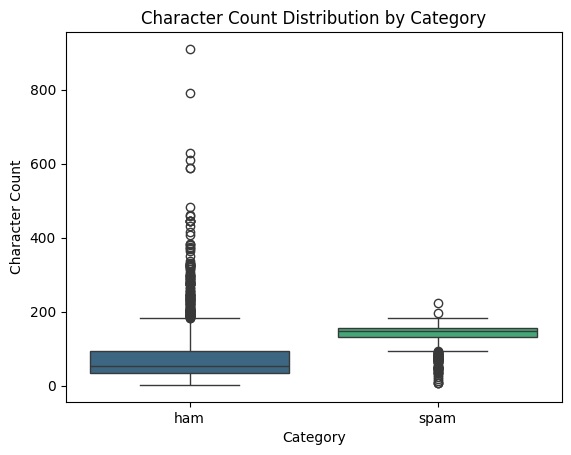

In [11]:
df['char_count'] = df['Message'].apply(len)
sns.boxplot(x='Category', hue='Category', y='char_count', data=df, palette="viridis")
plt.title("Character Count Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Character Count")
plt.show()

Observations:

- The dataset is very imbalanced with the target class only containing a 13,41% of the class "SPAM" 
- Most HAM messages have between 0 and 25 words. The frequency falls dramatically when the word count increases. 
- Most SPAM messages are also short but they are more likely to have between 10 and 40 words. 
- There is a high superposition in the range of 20-40 words that could affect the classification.
- There are no long SPAM messages. 
- SPAM messages tend to have more characters even though the messages are shorter.

# Data Cleaning

In [12]:
import re
import string

In [13]:
pd.set_option('display.max_colwidth', None)

In [14]:
df_cleaned = df.copy()

df_cleaned['Message'].iloc[0:10]

0                                                     Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1                                                                                                                                       Ok lar... Joking wif u oni...
2         Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3                                                                                                                   U dun say so early hor... U c already then say...
4                                                                                                       Nah I don't think he goes to usf, he lives around here though
5                 FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6   

#### Remove punctuation

In [15]:
df_cleaned['Message']=df_cleaned['Message'].apply(str)

def clean_text(text):
    text = text.lower()
    text=re.sub('<.*?>', ' ', text)  
    text = text.translate(str.maketrans(' ',' ',string.punctuation))
    text = re.sub('[^a-zA-Z]',' ',text)  
    text = re.sub("\n"," ",text)

    text=' '.join(text.split())
    text = re.sub(r"\s+"," ",text).strip()
    return text


df_cleaned['Message']=df_cleaned['Message'].apply(clean_text)

In [18]:
df_cleaned['Message'].iloc[0:10]

0                                                      go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1                                                                                                                                     ok lar joking wif u oni
2                                  free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply over s
3                                                                                                                 u dun say so early hor u c already then say
4                                                                                                 nah i dont think he goes to usf he lives around here though
5                        freemsg hey there darling its been weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send to rcv
6                                                   

#### Tokenization

In [21]:
df_cleaned['Message'] = df_cleaned['Message'].apply(word_tokenize)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/maldu/nltk_data'
    - '/home/maldu/.cache/pypoetry/virtualenvs/spam-detector-P2ybB3t6-py3.10/nltk_data'
    - '/home/maldu/.cache/pypoetry/virtualenvs/spam-detector-P2ybB3t6-py3.10/share/nltk_data'
    - '/home/maldu/.cache/pypoetry/virtualenvs/spam-detector-P2ybB3t6-py3.10/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


#### Stopwords

In [ ]:
from nltk.corpus import stopwords


df['text'] = [x for x in df['text'] if x not in stopwords.words('english')]

#### Stemming

In [ ]:
import nltk
from nltk.stem.porter import *

porterStemmer = PorterStemmer()


def stem_sentences(text):
    stemmed_tokens = [porterStemmer.stem(w) for w in text]
    return ' '.join(stemmed_tokens)

df['text'] = df['text'].apply(stem_sentences)

#### Lemmatizing

In [ ]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

lemmmatizer=WordNetLemmatizer()
 
def lem_sentences(text):
    words=word_tokenize(text)
    lemmed_words = [WordNetLemmatizer().lemmatize(w) for w in text]
    return ''.join(lemmed_words)

df['text'] = df['text'].apply(lem_sentences)

#### Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(df['text'])

print(vectorizer.get_feature_names())


In [ ]:
vectors.toarray()



In [ ]:
vectors.shape

In [ ]:
##TRAINING AND TEST DATASET PREPARATION


In [ ]:
X = vectors
Y = df['spam']

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [ ]:
X_train

In [ ]:
#### Logistic Regression



In [ ]:


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)



In [ ]:
Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)
print(cm)

accuracy_score(Y_test,Y_Pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_Pred))

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_Pred)

In [ ]:
#### Decision Tree

In [ ]:


from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)



In [ ]:
#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0,)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)

In [ ]:
#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)

In [ ]:
#### SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state=0)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state=0)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)

In [ ]:
#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p = 2)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)